СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ МАШИННОГО ОБУЧЕНИЯ
Размеры данных:
Обучающая выборка: (5000, 784)
Тестовая выборка: (1000, 784)

ОБУЧЕНИЕ МОДЕЛЕЙ
1. Обучение k-NN...
   k-NN обучен!
2. Обучение SVM...
   SVM обучен!
3. Обучение Random Forest...
   Random Forest обучен!
4. Обучение полносвязной нейросети...
   Полносвязная сеть обучена!
5. Обучение CNN...
   CNN обучена!

ОЦЕНКА МОДЕЛЕЙ


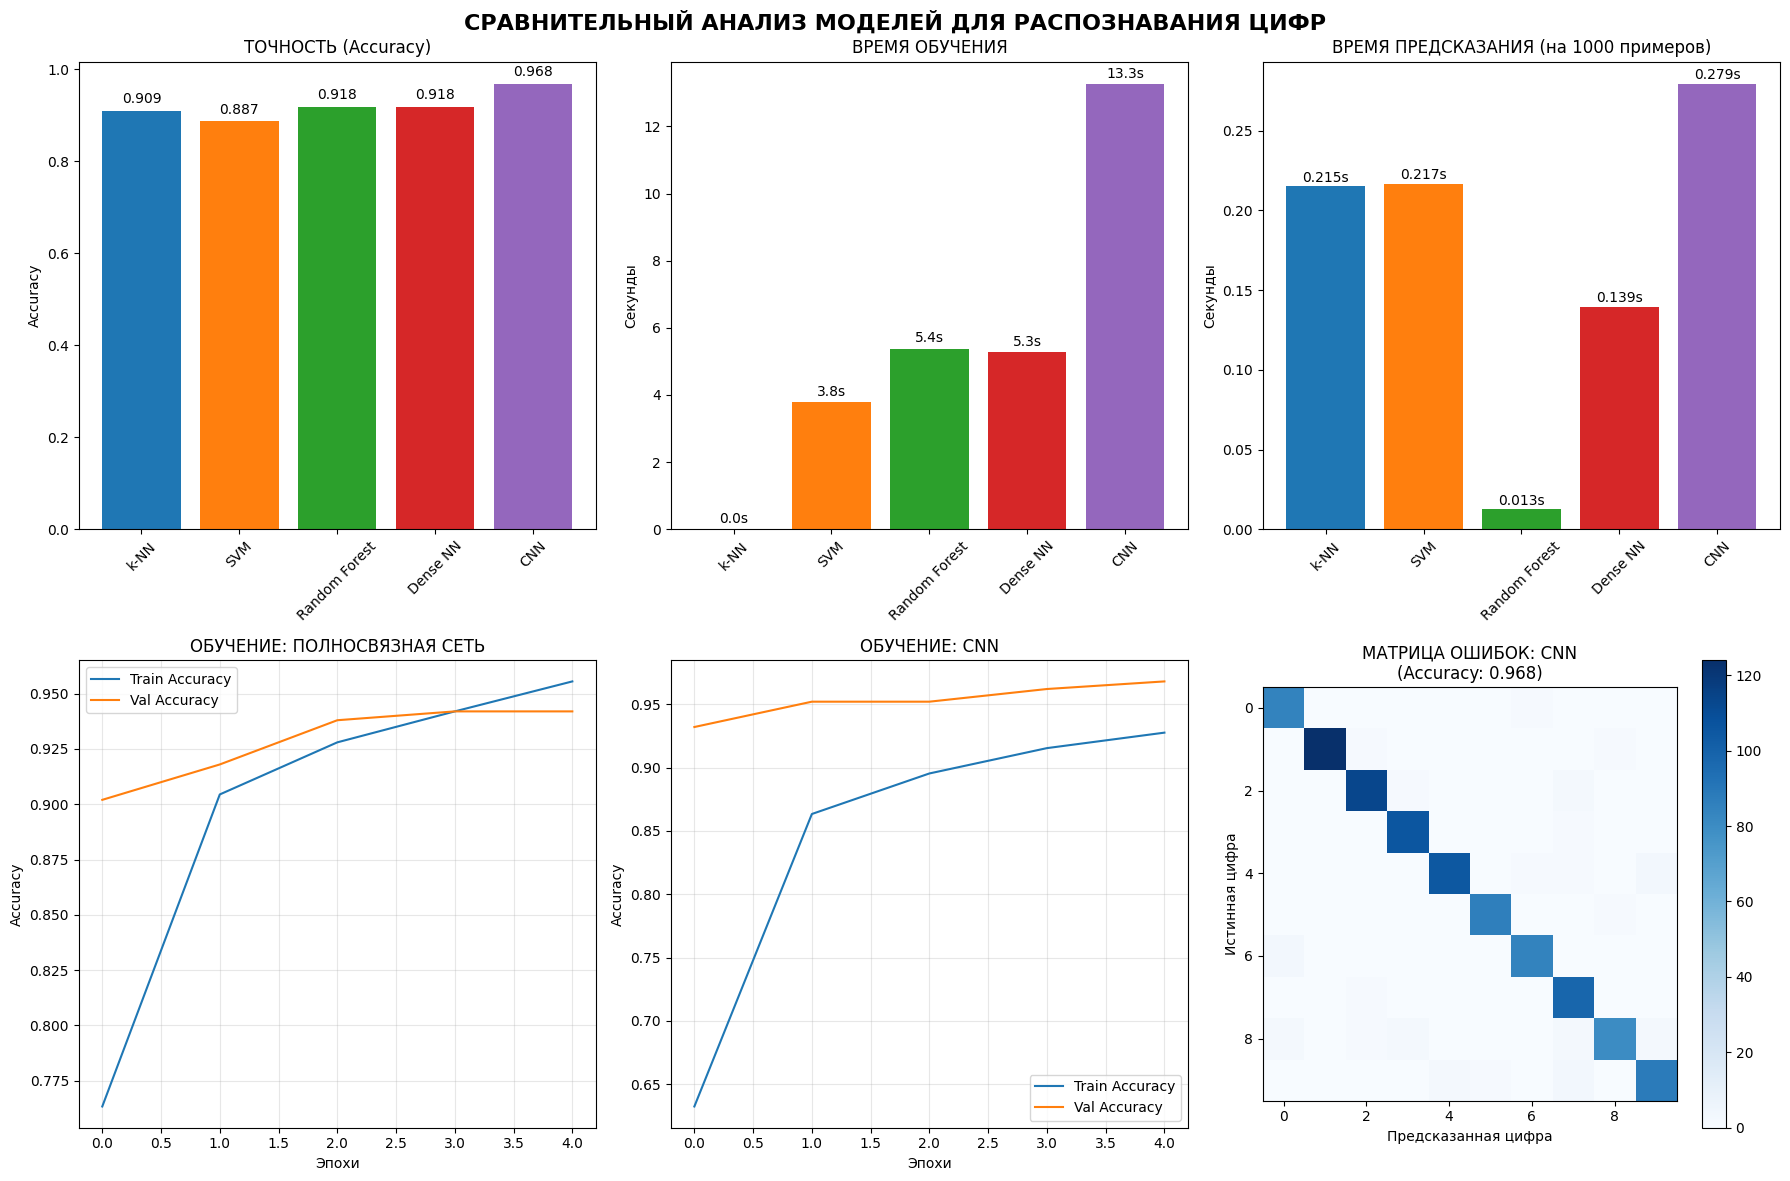


ИТОГОВЫЕ РЕЗУЛЬТАТЫ
        Model  Accuracy  Training Time (s)  Inference Time (s)
         k-NN     0.909           0.004899            0.215058
          SVM     0.887           3.791507            0.216714
Random Forest     0.918           5.381126            0.012622
     Dense NN     0.918           5.281799            0.139391
          CNN     0.968          13.267381            0.279382

ЛУЧШАЯ МОДЕЛЬ: CNN
Точность: 0.9680

КРАТКИЙ АНАЛИЗ:
• Классические модели: быстрее обучаются, подходят для baseline
• Нейросети: выше точность, но требуют больше времени и ресурсов
• CNN: лучшая для изображений, но самая сложная вычислительно
• Random Forest: хороший баланс точности и скорости

ДЕМОНСТРАЦИЯ ПРЕДСКАЗАНИЙ


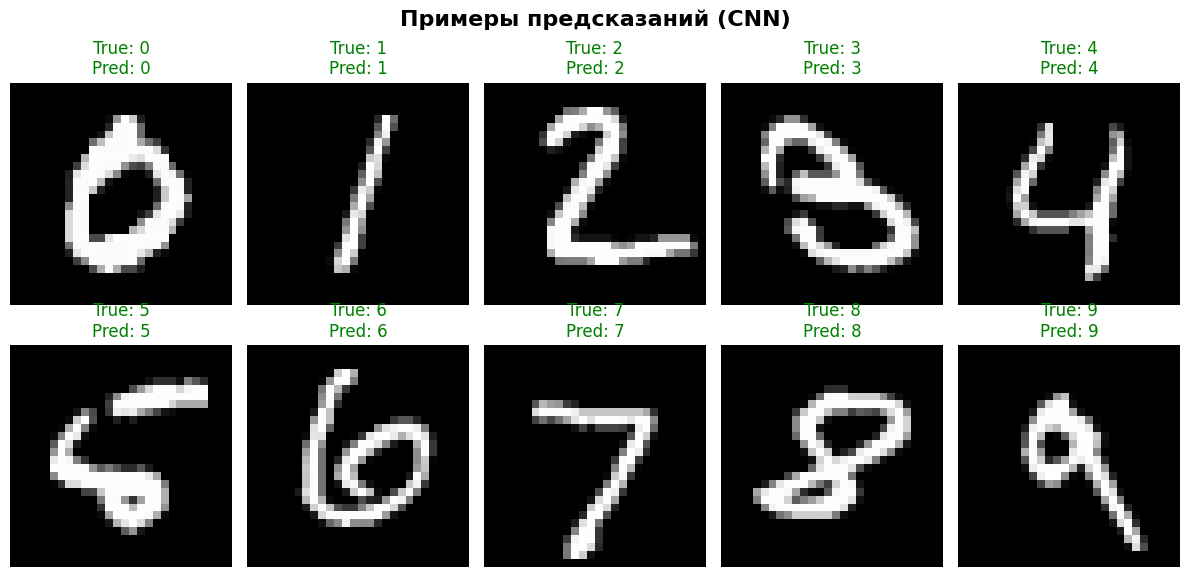


Анализ завершен!


In [2]:
"""
Сравнительный анализ моделей машинного обучения для распознавания рукописных цифр
=================================================================================

Анализируются 5 моделей:
1. k-NN (k-ближайших соседей)
2. SVM (метод опорных векторов)
3. Random Forest (случайный лес)
4. Полносвязная нейронная сеть
5. Сверточная нейронная сеть (CNN)
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import pandas as pd

# ---------------------------------------------------------------------
# 1. Настройка и загрузка данных
# ---------------------------------------------------------------------
print("=" * 70)
print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ МАШИННОГО ОБУЧЕНИЯ")
print("=" * 70)

# Загружаем данные MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Нормируем пиксели к диапазону 0…1
x_train = (x_train / 255.0).astype("float32")
x_test = (x_test / 255.0).astype("float32")

# Для классических моделей преобразуем в 1D
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Берем подмножество для быстрого тестирования
train_size = 5000
test_size = 1000
x_train_small = x_train_flat[:train_size]
y_train_small = y_train[:train_size]
x_test_small = x_test_flat[:test_size]
y_test_small = y_test[:test_size]

print(f"Размеры данных:")
print(f"Обучающая выборка: {x_train_small.shape}")
print(f"Тестовая выборка: {x_test_small.shape}")

# ---------------------------------------------------------------------
# 2. Функции для создания и оценки моделей
# ---------------------------------------------------------------------
def create_dense_model():
    """Создает полносвязную нейронную сеть"""
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
    return model

def create_cnn_model():
    """Создает сверточную нейронную сеть"""
    model = keras.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
    return model

def evaluate_model(model, x_test, y_test, model_name):
    """Оценка модели и возврат метрик"""
    start_time = time.time()

    if model_name in ["Dense NN", "CNN"]:
        y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)
    else:
        y_pred = model.predict(x_test)

    inference_time = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, inference_time, y_pred

# ---------------------------------------------------------------------
# 3. Обучение и оценка моделей
# ---------------------------------------------------------------------
results = {}
predictions = {}
models = {}

print("\n" + "="*50)
print("ОБУЧЕНИЕ МОДЕЛЕЙ")
print("="*50)

# 3.1 k-NN
print("1. Обучение k-NN...")
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_small, y_train_small)
knn_time = time.time() - start_time
results['k-NN'] = {'train_time': knn_time}
models['k-NN'] = knn_model
print("   k-NN обучен!")

# 3.2 SVM
print("2. Обучение SVM...")
start_time = time.time()
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train_small, y_train_small)
svm_time = time.time() - start_time
results['SVM'] = {'train_time': svm_time}
models['SVM'] = svm_model
print("   SVM обучен!")

# 3.3 Random Forest
print("3. Обучение Random Forest...")
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)  # Уменьшено для скорости
rf_model.fit(x_train_small, y_train_small)
rf_time = time.time() - start_time
results['Random Forest'] = {'train_time': rf_time}
models['Random Forest'] = rf_model
print("   Random Forest обучен!")

# 3.4 Полносвязная нейросеть
print("4. Обучение полносвязной нейросети...")
dense_model = create_dense_model()
start_time = time.time()
dense_history = dense_model.fit(x_train_flat[:train_size], y_train[:train_size],
                               epochs=5, batch_size=32, verbose=0,  # Уменьшено для скорости
                               validation_split=0.1)
dense_time = time.time() - start_time
results['Dense NN'] = {'train_time': dense_time, 'history': dense_history}
models['Dense NN'] = dense_model
print("   Полносвязная сеть обучена!")

# 3.5 CNN
print("5. Обучение CNN...")
cnn_model = create_cnn_model()
# Подготовка данных для CNN
x_train_cnn = x_train[:train_size].reshape(-1, 28, 28, 1)
x_test_cnn = x_test[:test_size].reshape(-1, 28, 28, 1)

start_time = time.time()
cnn_history = cnn_model.fit(x_train_cnn, y_train[:train_size],
                           epochs=5, batch_size=32, verbose=0,  # Уменьшено для скорости
                           validation_split=0.1)
cnn_time = time.time() - start_time
results['CNN'] = {'train_time': cnn_time, 'history': cnn_history}
models['CNN'] = cnn_model
print("   CNN обучена!")

# ---------------------------------------------------------------------
# 4. Оценка всех моделей
# ---------------------------------------------------------------------
print("\n" + "="*50)
print("ОЦЕНКА МОДЕЛЕЙ")
print("="*50)

# Создаем таблицу для результатов
comparison_data = []

# Оценка классических моделей
for model_name in ['k-NN', 'SVM', 'Random Forest']:
    model = models[model_name]
    accuracy, inf_time, y_pred = evaluate_model(model, x_test_small, y_test_small, model_name)
    results[model_name]['accuracy'] = accuracy
    results[model_name]['inference_time'] = inf_time
    predictions[model_name] = y_pred

    comparison_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Training Time (s)': results[model_name]['train_time'],
        'Inference Time (s)': inf_time
    })

# Оценка нейросетевых моделей
for model_name in ['Dense NN', 'CNN']:
    model = models[model_name]

    if model_name == 'Dense NN':
        x_test_eval = x_test_flat[:test_size]
    else:
        x_test_eval = x_test_cnn[:test_size]

    accuracy, inf_time, y_pred = evaluate_model(model, x_test_eval, y_test_small, model_name)
    results[model_name]['accuracy'] = accuracy
    results[model_name]['inference_time'] = inf_time
    predictions[model_name] = y_pred

    comparison_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Training Time (s)': results[model_name]['train_time'],
        'Inference Time (s)': inf_time
    })

comparison_df = pd.DataFrame(comparison_data)

# ---------------------------------------------------------------------
# 5. Визуализация результатов
# ---------------------------------------------------------------------
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ ДЛЯ РАСПОЗНАВАНИЯ ЦИФР', fontsize=16, fontweight='bold')

# 5.1 Сравнение точности
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
axes[0, 0].bar(comparison_df['Model'], comparison_df['Accuracy'], color=colors)
axes[0, 0].set_title('ТОЧНОСТЬ (Accuracy)')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# 5.2 Время обучения
axes[0, 1].bar(comparison_df['Model'], comparison_df['Training Time (s)'], color=colors)
axes[0, 1].set_title('ВРЕМЯ ОБУЧЕНИЯ')
axes[0, 1].set_ylabel('Секунды')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Training Time (s)']):
    axes[0, 1].text(i, v + 0.1, f'{v:.1f}s', ha='center', va='bottom')

# 5.3 Время предсказания
axes[0, 2].bar(comparison_df['Model'], comparison_df['Inference Time (s)'], color=colors)
axes[0, 2].set_title('ВРЕМЯ ПРЕДСКАЗАНИЯ (на 1000 примеров)')
axes[0, 2].set_ylabel('Секунды')
axes[0, 2].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Inference Time (s)']):
    axes[0, 2].text(i, v + 0.001, f'{v:.3f}s', ha='center', va='bottom')

# 5.4 Графики обучения нейросетей
if 'history' in results['Dense NN']:
    axes[1, 0].plot(results['Dense NN']['history'].history['accuracy'], label='Train Accuracy')
    axes[1, 0].plot(results['Dense NN']['history'].history['val_accuracy'], label='Val Accuracy')
    axes[1, 0].set_title('ОБУЧЕНИЕ: ПОЛНОСВЯЗНАЯ СЕТЬ')
    axes[1, 0].set_xlabel('Эпохи')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

if 'history' in results['CNN']:
    axes[1, 1].plot(results['CNN']['history'].history['accuracy'], label='Train Accuracy')
    axes[1, 1].plot(results['CNN']['history'].history['val_accuracy'], label='Val Accuracy')
    axes[1, 1].set_title('ОБУЧЕНИЕ: CNN')
    axes[1, 1].set_xlabel('Эпохи')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

# 5.5 Матрица ошибок для лучшей модели
best_model_name = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']
if best_model_name in predictions:
    cm = confusion_matrix(y_test_small, predictions[best_model_name])
    im = axes[1, 2].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[1, 2].set_title(f'МАТРИЦА ОШИБОК: {best_model_name}\n(Accuracy: {results[best_model_name]["accuracy"]:.3f})')
    plt.colorbar(im, ax=axes[1, 2])
    axes[1, 2].set_xlabel('Предсказанная цифра')
    axes[1, 2].set_ylabel('Истинная цифра')

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 6. Вывод результатов
# ---------------------------------------------------------------------
print("\n" + "="*70)
print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ")
print("="*70)
print(comparison_df.to_string(index=False))

print(f"\nЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"Точность: {results[best_model_name]['accuracy']:.4f}")

print("\nКРАТКИЙ АНАЛИЗ:")
print("• Классические модели: быстрее обучаются, подходят для baseline")
print("• Нейросети: выше точность, но требуют больше времени и ресурсов")
print("• CNN: лучшая для изображений, но самая сложная вычислительно")
print("• Random Forest: хороший баланс точности и скорости")

# ---------------------------------------------------------------------
# 7. Демонстрация примеров предсказаний
# ---------------------------------------------------------------------
print("\n" + "="*50)
print("ДЕМОНСТРАЦИЯ ПРЕДСКАЗАНИЙ")
print("="*50)

# Выбираем по одному примеру каждой цифры
demo_indices = []
for digit in range(10):
    idx = np.where(y_test == digit)[0][0]
    demo_indices.append(idx)

demo_images = x_test[demo_indices]
true_labels = y_test[demo_indices]

# Предсказания лучшей модели
best_model = models[best_model_name]
if best_model_name in ['Dense NN', 'CNN']:
    if best_model_name == 'Dense NN':
        demo_images_flat = demo_images.reshape(10, -1)
        demo_pred = np.argmax(best_model.predict(demo_images_flat, verbose=0), axis=1)
    else:
        demo_images_cnn = demo_images.reshape(10, 28, 28, 1)
        demo_pred = np.argmax(best_model.predict(demo_images_cnn, verbose=0), axis=1)
else:
    demo_images_flat = demo_images.reshape(10, -1)
    demo_pred = best_model.predict(demo_images_flat)

# Визуализация демонстрационных примеров
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(demo_images[i], cmap='gray')
    color = 'green' if true_labels[i] == demo_pred[i] else 'red'
    plt.title(f'True: {true_labels[i]}\nPred: {demo_pred[i]}', color=color)
    plt.axis('off')
plt.suptitle(f'Примеры предсказаний ({best_model_name})', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nАнализ завершен!")